### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data: 

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [4]:
data = pd.read_csv("Student_performance_data _.csv")
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [6]:
# Remove StudentID column
data = data.drop(columns=['StudentID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB


### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [7]:
# Check for missing values
print(data.isnull().sum())

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.
 
 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [8]:
# Your code here
x = data.drop(columns=['GPA'])
y = data['GPA']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Scale features using StandardScaler (fit on train, transform on test)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print('x_train shape:', x_train.shape, 'x_test shape:', x_test.shape)

x_train shape: (1913, 13) x_test shape: (479, 13)


### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [8]:
# Your code here
model = Sequential()
# Use the number of features from x_train for the input shape
model.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # linear output for regression

c:\Users\Pansocrates03\Documents\7mo Semestre\DEEP LEARNING\act3\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [9]:
# Your code here
# For regression use MSE loss and track MAE as a metric
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [10]:
# Your code here
# fit the keras model on the dataset
# Use a validation split and store the history
history = model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.1096 - mae: 0.7417 - val_loss: 0.1493 - val_mae: 0.3119
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.1096 - mae: 0.7417 - val_loss: 0.1493 - val_mae: 0.3119
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1040 - mae: 0.2573 - val_loss: 0.0949 - val_mae: 0.2516
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1040 - mae: 0.2573 - val_loss: 0.0949 - val_mae: 0.2516
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0698 - mae: 0.2132 - val_loss: 0.0749 - val_mae: 0.2238
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0698 - mae: 0.2132 - val_loss: 0.0749 - val_mae: 0.2238
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0567 - mae: 0.1912 - val_loss: 0.0723 - val_mae: 0.2169
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0567 - mae: 0.1912 - val_loss: 0.0723 - val_mae: 0.2169
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - 

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

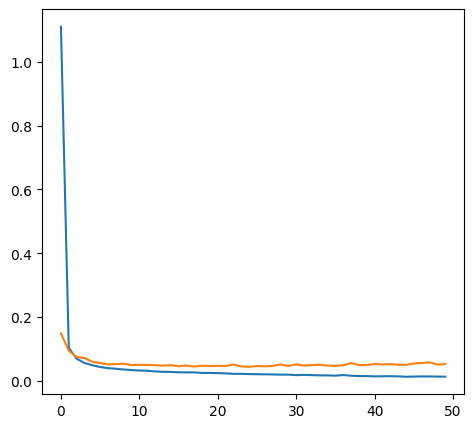

In [11]:
# Matplotlib code to show graphs of model training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

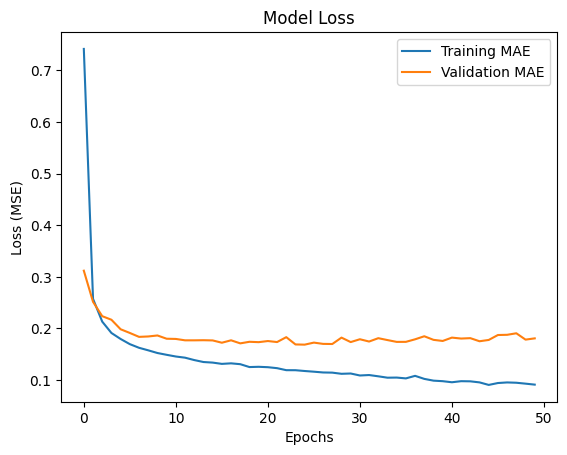

In [33]:
# Result of loss function
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend(["Training MAE", "Validation MAE"])
plt.show()



### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [13]:
# Make predictions and evaluate the model
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MSE: {mse}, Test MAE: {mae}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test MSE: 0.05553159080897823, Test MAE: 0.1814346866158936
Test MSE: 0.05553159080897823, Test MAE: 0.1814346866158936


### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [19]:
# Model 2
model2 = Sequential()
model2.add(Dense(128, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dropout(0.3))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dense(1))  # linear output for regression

# Compile the second model
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Fit the second model
history2 = model2.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Make predictions and evaluate the model
y_pred = model2.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MSE: {mse}, Test MAE: {mae}')


Epoch 1/100


c:\Users\Pansocrates03\Documents\7mo Semestre\DEEP LEARNING\act3\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.6743 - mae: 0.5546 - val_loss: 0.3671 - val_mae: 0.3881
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.6743 - mae: 0.5546 - val_loss: 0.3671 - val_mae: 0.3881
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3908 - mae: 0.3907 - val_loss: 0.3115 - val_mae: 0.3466
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3908 - mae: 0.3907 - val_loss: 0.3115 - val_mae: 0.3466
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3076 - mae: 0.3247 - val_loss: 0.2624 - val_mae: 0.3009
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3076 - mae: 0.3247 - val_loss: 0.2624 - val_mae: 0.3009
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2770 - mae: 0.3003 - val_loss: 0.3260 - val_mae: 0.3781
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2770 - mae: 0.3003 - val_loss: 0.3260 - val_mae: 0.3781
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss:

Realizar tests al modelo 2

In [20]:
# Make predictions and evaluate the model
y_pred = model2.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MSE: {mse}, Test MAE: {mae}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Test MSE: 0.05294810358332716, Test MAE: 0.18103118290938466
Test MSE: 0.05294810358332716, Test MAE: 0.18103118290938466


#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [17]:
# Model 3
model3 = Sequential()
model3.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(50, activation='relu'))
model3.add(Dense(1))  # linear output for regression
# Your code here
model3.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Fit the third model
history3 = model3.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

c:\Users\Pansocrates03\Documents\7mo Semestre\DEEP LEARNING\act3\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.4360 - mae: 0.4902 - val_loss: 0.1589 - val_mae: 0.3194
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.4360 - mae: 0.4902 - val_loss: 0.1589 - val_mae: 0.3194
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1256 - mae: 0.2801 - val_loss: 0.1053 - val_mae: 0.2589
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1256 - mae: 0.2801 - val_loss: 0.1053 - val_mae: 0.2589
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0965 - mae: 0.2470 - val_loss: 0.0968 - val_mae: 0.2454
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0965 - mae: 0.2470 - val_loss: 0.0968 - val_mae: 0.2454
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0832 - mae: 0.2286 - val_loss: 0.0824 - val_mae: 0.2242
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0832 - mae: 0.2286 - val_loss: 0.0824 - val_mae: 0.2242
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - 

In [21]:
# Make predictions and evaluate the model
y_pred = model3.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MSE: {mse}, Test MAE: {mae}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test MSE: 0.04503756368444725, Test MAE: 0.16592758621392015
Test MSE: 0.04503756368444725, Test MAE: 0.16592758621392015


# Dense + Dropout + Batch Normalization

## Experiment 1:  A single Dense Hidden Layer

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Experiment 1:  A single Dense Hidden Layer
# Create the model
model = Sequential()
model.add(Dense(1, input_shape=(x_train.shape[1],), activation='relu'))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Run the model
history = model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

# Make predictions and evaluate the model
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test MSE: {mse}, Test MAE: {mae}')

Epoch 1/50


c:\Users\Pansocrates03\Documents\7mo Semestre\DEEP LEARNING\act3\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.5968 - mae: 1.6174 - val_loss: 3.5391 - val_mae: 1.5891
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.5968 - mae: 1.6174 - val_loss: 3.5391 - val_mae: 1.5891
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3335 - mae: 1.5509 - val_loss: 3.1171 - val_mae: 1.4836
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3335 - mae: 1.5509 - val_loss: 3.1171 - val_mae: 1.4836
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9633 - mae: 1.4509 - val_loss: 2.6514 - val_mae: 1.3600
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9633 - mae: 1.4509 - val_loss: 2.6514 - val_mae: 1.3600
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5258 - mae: 1.3244 - val_loss: 2.1276 - val_mae: 1.2035
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5258 - mae: 1.3244 - val_loss: 2.1276 - val_mae: 1.2035
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0377 

# Experiment 2: A set of three Dense Hidden Layers

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model_2 = Sequential()
model_2.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))
model_2.add(Dense(32, input_shape=(x_train.shape[1],), activation='relu'))
model_2.add(Dense(1, input_shape=(x_train.shape[1],), activation='relu'))

# Compile the model
model_2.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Run the model
history = model_2.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

# Make predictions and evaluate the model
y_pred = model_2.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test MSE: {mse}, Test MAE: {mae}')

Epoch 1/50


c:\Users\Pansocrates03\Documents\7mo Semestre\DEEP LEARNING\act3\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6814 - mae: 0.5658 - val_loss: 0.1194 - val_mae: 0.2798
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6814 - mae: 0.5658 - val_loss: 0.1194 - val_mae: 0.2798
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0987 - mae: 0.2512 - val_loss: 0.0844 - val_mae: 0.2341
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0987 - mae: 0.2512 - val_loss: 0.0844 - val_mae: 0.2341
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0729 - mae: 0.2174 - val_loss: 0.0666 - val_mae: 0.2083
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0729 - mae: 0.2174 - val_loss: 0.0666 - val_mae: 0.2083
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0586 - mae: 0.1941 - val_loss: 0.0648 - val_mae: 0.2021
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0586 - mae: 0.1941 - val_loss: 0.0648 - val_mae: 0.2021
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0513 

# Experiment 3: Add a dropout after each Dense Hidden Layer

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Create the model
model_3 = Sequential()
model_3.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(32, input_shape=(x_train.shape[1],), activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(1, input_shape=(x_train.shape[1],), activation='relu'))
model_3.add(Dropout(0.2))

# Compile the model
model_3.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Run the model
history = model_3.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

# Make predictions and evaluate the model
y_pred = model_3.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test MSE: {mse}, Test MAE: {mae}')

Epoch 1/50


c:\Users\Pansocrates03\Documents\7mo Semestre\DEEP LEARNING\act3\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.4875 - mae: 0.9140 - val_loss: 0.4283 - val_mae: 0.5653
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.4875 - mae: 0.9140 - val_loss: 0.4283 - val_mae: 0.5653
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2065 - mae: 0.7662 - val_loss: 0.3534 - val_mae: 0.5117
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2065 - mae: 0.7662 - val_loss: 0.3534 - val_mae: 0.5117
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0123 - mae: 0.6915 - val_loss: 0.3677 - val_mae: 0.5272
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0123 - mae: 0.6915 - val_loss: 0.3677 - val_mae: 0.5272
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9722 - mae: 0.6644 - val_loss: 0.3984 - val_mae: 0.5477
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9722 - mae: 0.6644 - val_loss: 0.3984 - val_mae: 0.5477
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1365 

# Experiment 4: Add a Batch Normalization Layer after each Dropout Layer

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

# Create the model
model_4 = Sequential()
model_4.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(BatchNormalization())
model_4.add(Dense(32, input_shape=(x_train.shape[1],), activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(BatchNormalization())
model_4.add(Dense(1, input_shape=(x_train.shape[1],), activation='relu'))

# Compile the model
model_4.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Run the model
history = model_4.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

# Make predictions and evaluate the model
y_pred = model_3.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test MSE: {mse}, Test MAE: {mae}')

c:\Users\Pansocrates03\Documents\7mo Semestre\DEEP LEARNING\act3\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.1202 - mae: 1.2000 - val_loss: 0.6221 - val_mae: 0.6370
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.1202 - mae: 1.2000 - val_loss: 0.6221 - val_mae: 0.6370
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1017 - mae: 0.8753 - val_loss: 0.3842 - val_mae: 0.4696
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1017 - mae: 0.8753 - val_loss: 0.3842 - val_mae: 0.4696
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8840 - mae: 0.7676 - val_loss: 0.3372 - val_mae: 0.4451
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8840 - mae: 0.7676 - val_loss: 0.3372 - val_mae: 0.4451
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6921 - mae: 0.6675 - val_loss: 0.2621 - val_mae: 0.4000
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6921 - mae: 0.6675 - val_loss: 0.2621 - val_mae: 0.4000
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

In [17]:
# Comparative evaluation for Experiment 1-4
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

results = []
models = {
    'Experiment 1': globals().get('model'),
    'Experiment 2': globals().get('model_2'),
    'Experiment 3': globals().get('model_3'),
    'Experiment 4': globals().get('model_4'),
}

for name, m in models.items():
    if m is None:
        results.append({'Experiment': name, 'Test MSE': None, 'Test MAE': None, 'Params': None, 'Status': 'Model not defined'})
        continue
    try:
        # Some models (like Conv1D) may expect 3D input; try to reshape if needed
        x_test_in = x_test
        if len(m.input_shape) == 3 and x_test.ndim == 2:
            # reshape to (samples, timesteps, features) where timesteps=features and features=1
            x_test_in = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
        y_pred = m.predict(x_test_in)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        params = m.count_params()
        results.append({'Experiment': name, 'Test MSE': mse, 'Test MAE': mae, 'Params': params, 'Status': 'OK'})
    except Exception as e:
        results.append({'Experiment': name, 'Test MSE': None, 'Test MAE': None, 'Params': getattr(m, 'count_params', lambda: None)(), 'Status': f'Error: {str(e)}'})

df_results = pd.DataFrame(results)
# Sort by Test MAE ascending when available
df_results_sorted = df_results.sort_values(by=['Test MAE'], na_position='last')

print('Comparative results:')

display(df_results_sorted)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Comparative results:
Comparative results:


,Experiment,Test MSE,Test MAE,Params,Status
0,Experiment 1,0.035868,0.150556,14,OK
3,Experiment 4,0.039956,0.156465,3393,OK
1,Experiment 2,0.059539,0.193885,3009,OK
2,Experiment 3,0.257353,0.438873,3009,OK
